- Read Data

In [1]:
import os
import codecs
def readfile(filename):
	current_path=os.path.abspath(os.curdir)
	file_path=os.path.join(current_path,filename)
	if not os.path.exists(file_path):
		print("error:file not found:"+filename)
		return ""
	f=codecs.open(file_path,"r","utf-8")
	s=f.read()
	f.close()
	return s

In [2]:
train_data=readfile("train.csv")
test_data=readfile("test.csv")

- Data Transforming

In [3]:
data_train=[]
label_train=[]
temp_list=train_data.splitlines()
del temp_list[0]
i=0
for item in temp_list:
  temp=item.split(",")
  i=i+1
  print("training data-"+str(i))
  data_train.append([float(temp[0]),float(temp[1]),float(temp[2]),float(temp[3]),float(temp[4])])
  label_train.append(int(temp[5]))
data_test=[]
temp_list=test_data.splitlines()
del temp_list[0]
for item in temp_list:
  temp=item.split(",")
  data_test.append([float(temp[0]),float(temp[1]),float(temp[2]),float(temp[3]),float(temp[4])])

流式输出内容被截断，只能显示最后 5000 行内容。
training data-95002
training data-95003
training data-95004
training data-95005
training data-95006
training data-95007
training data-95008
training data-95009
training data-95010
training data-95011
training data-95012
training data-95013
training data-95014
training data-95015
training data-95016
training data-95017
training data-95018
training data-95019
training data-95020
training data-95021
training data-95022
training data-95023
training data-95024
training data-95025
training data-95026
training data-95027
training data-95028
training data-95029
training data-95030
training data-95031
training data-95032
training data-95033
training data-95034
training data-95035
training data-95036
training data-95037
training data-95038
training data-95039
training data-95040
training data-95041
training data-95042
training data-95043
training data-95044
training data-95045
training data-95046
training data-95047
training data-95048
training data-95049
training data

In [4]:
print(len(data_train))
print(len(label_train))
print(len(data_test))

100000
100000
2000


In [5]:
print(data_train[0:20])
print(label_train[0:20])
print(data_train[50000:50020])
print(label_train[50000:50020])
print(data_test[0:100])

[[0.0, 0.032258065, 0.0, 0.014847847, 0.0], [0.058823529, 0.202586207, 0.198302841, 0.061032373, 7.414004348], [0.055776892, 0.06547619, 0.132075472, 0.015469653, 7.029562949], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.052631579, 0.0, 0.051639778, 0.0], [0.0, 0.194388778, 0.0, 0.017942156, 0.0], [0.0, 0.05982906, 0.0, 0.007843753, 0.0], [0.0, 0.214285714, 0.0, 0.091766294, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.024512256, 0.041791045, 0.079545874, 0.016495722, 23.50311726], [0.005504587, 0.021164021, 0.018218661, 0.004012026, 2.760612607], [0.010964912, 0.036697248, 0.026859342, 0.004952052, 14.31519496], [0.0, 0.0, 0.0, 0.0, 0.0], [3.27e-05, 0.0, 0.001854232, 0.0, 0.627758922], [0.0, 0.250713606, 0.0, 0.010158593, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.082901554, 0.0, 0.024170287, 0.0], [0.130573248, 0.238095238, 0.231317459, 0.048479938, 20.30793216]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[0.0, 0.0, 0.0, 0.0, 0.0],

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_dev, Y_train, Y_dev = train_test_split(data_train, label_train, test_size=0.3, random_state=0)
X_test=data_test

- Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.metrics import roc_auc_score
score=0
set_penalty=''
set_C=-1
for p in ['l1', 'l2']:
  for c in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    model.set_params(penalty=p,C=c,solver='saga')
    model.fit(X_train, Y_train)
    predictions=model.predict(X_dev)
    this_score=roc_auc_score(Y_dev,predictions)
    if this_score>score:
      score=this_score
      set_penalty=p
      set_C=c
    print("penalty= ",p,"C= ",c,",score=",this_score)
print("--------------------------------")
print("Best Model:")
print("penalty= ",set_penalty,"C= ",set_C,",score=",score)
model.set_params(penalty=set_penalty,C=set_C,solver='saga')

penalty=  l1 C=  1e-05 ,score= 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l1 C=  0.0001 ,score= 0.6272123242011408


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l1 C=  0.001 ,score= 0.6272123242011408


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l1 C=  0.01 ,score= 0.6285210679242821


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l1 C=  0.1 ,score= 0.629125134601065


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l1 C=  1 ,score= 0.6292592817604987


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l1 C=  10 ,score= 0.629125134601065


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l1 C=  100 ,score= 0.6291922081807818


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l1 C=  1000 ,score= 0.6292592817604987


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l1 C=  10000 ,score= 0.6291586713909235


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l2 C=  1e-05 ,score= 0.6290915978112065


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l2 C=  0.0001 ,score= 0.6292592817604987


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l2 C=  0.001 ,score= 0.6292592817604987


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l2 C=  0.01 ,score= 0.6291586713909235


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l2 C=  0.1 ,score= 0.6291586713909235


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l2 C=  1 ,score= 0.6292592817604987


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l2 C=  10 ,score= 0.629125134601065


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l2 C=  100 ,score= 0.6290915978112065


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


penalty=  l2 C=  1000 ,score= 0.629125134601065
penalty=  l2 C=  10000 ,score= 0.6291586713909235
--------------------------------
Best Model:
penalty=  l1 C=  1 ,score= 0.6292592817604987


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
from sklearn.metrics import classification_report
predictions = model.predict(X_dev)
print(classification_report(Y_dev,predictions))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     15091
           1       0.99      0.26      0.41     14909

    accuracy                           0.63     30000
   macro avg       0.79      0.63      0.57     30000
weighted avg       0.78      0.63      0.57     30000



- KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [11]:
from sklearn.metrics import roc_auc_score
score=0
set_K=0
set_weights=''
for w in ['distance','uniform']:
  for k in range(1,10):
    model.set_params(n_neighbors=k,weights=w)
    model.fit(X_train,Y_train)
    predictions=model.predict(X_dev)
    this_score=roc_auc_score(Y_dev,predictions)
    print("k= ",k,",weights=",w,",score=",this_score)
    if this_score>score:
        score=this_score
        set_K=k
        set_weights=w
model.set_params(n_neighbors=set_K,weights=set_weights)
print("--------------------------------")
print("Best Model:")
print("k=",set_K,", weights=",set_weights)

k=  1 ,weights= distance ,score= 0.5123249602799825
k=  2 ,weights= distance ,score= 0.8099028213567273
k=  3 ,weights= distance ,score= 0.8170134630599449
k=  4 ,weights= distance ,score= 0.8170688073190817
k=  5 ,weights= distance ,score= 0.8187311196106734
k=  6 ,weights= distance ,score= 0.8185242364408976
k=  7 ,weights= distance ,score= 0.8194709512842115
k=  8 ,weights= distance ,score= 0.8194022598671731
k=  9 ,weights= distance ,score= 0.8197715690149466
k=  1 ,weights= uniform ,score= 0.5123249602799825
k=  2 ,weights= uniform ,score= 0.7994352649930196
k=  3 ,weights= uniform ,score= 0.8198806730304593
k=  4 ,weights= uniform ,score= 0.81594793717719
k=  5 ,weights= uniform ,score= 0.8220359256866695
k=  6 ,weights= uniform ,score= 0.8199283325623198
k=  7 ,weights= uniform ,score= 0.822280390239607
k=  8 ,weights= uniform ,score= 0.8218508499861722
k=  9 ,weights= uniform ,score= 0.8230464784350574
--------------------------------
Best Model:
k= 9 , weights= uniform


In [12]:
from sklearn.metrics import classification_report
predictions = model.predict(X_dev)
print(classification_report(Y_dev,predictions))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84     15091
           1       0.93      0.70      0.80     14909

    accuracy                           0.82     30000
   macro avg       0.85      0.82      0.82     30000
weighted avg       0.84      0.82      0.82     30000



- Fully Connected NN

**3 Layers**

In [13]:
import tensorflow as tf
from tensorboard.plugins.hparams import api
from keras import models as md
from keras import layers as lr
import numpy as np

model = md.Sequential()
model.add(lr.Dense(128,activation="relu"))
model.add(lr.Dense(4,activation="relu"))
model.add(lr.Dense(32,activation="relu"))
model.add(lr.Dropout(0.2))
model.add(lr.Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])#compile the model
model.fit(X_train, Y_train, epochs=16, batch_size=32)#fit the model

loss, acc = model.evaluate(X_dev, Y_dev)
print(loss,acc)

Epoch 1/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4637 - accuracy: 0.8014
Epoch 2/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4217 - accuracy: 0.8200
Epoch 3/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4170 - accuracy: 0.8222
Epoch 4/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4157 - accuracy: 0.8233
Epoch 5/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4150 - accuracy: 0.8241
Epoch 6/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4145 - accuracy: 0.8242
Epoch 7/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4149 - accuracy: 0.8244
Epoch 8/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4133 - accuracy: 0.8246
Epoch 9/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4130 - accuracy: 0.8249
Epoch 10/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.413

In [14]:
from sklearn.metrics import classification_report
predictions = model.predict(X_dev)
[rows, cols] = predictions.shape
for i in range(rows):
  for j in range(cols):
    predictions[i,j]=round(predictions[i,j])
print(classification_report(Y_dev,predictions))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84     15091
           1       0.92      0.71      0.80     14909

    accuracy                           0.83     30000
   macro avg       0.84      0.82      0.82     30000
weighted avg       0.84      0.83      0.82     30000



**2 Layers**

In [14]:
import tensorflow as tf
from tensorboard.plugins.hparams import api
from keras import models as md
from keras import layers as lr
import numpy as np

model = md.Sequential()
model.add(lr.Dense(32,activation="relu"))
model.add(lr.Dense(128,activation="relu"))
model.add(lr.Dropout(0.2))
model.add(lr.Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])#compile the model
model.fit(X_train, Y_train, epochs=16, batch_size=32)#fit the model

loss, acc = model.evaluate(X_dev, Y_dev)
print(loss,acc)

Epoch 1/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4877 - accuracy: 0.7851
Epoch 2/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4589 - accuracy: 0.8018
Epoch 3/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4557 - accuracy: 0.8036
Epoch 4/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4559 - accuracy: 0.8040
Epoch 5/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4556 - accuracy: 0.8042
Epoch 6/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4546 - accuracy: 0.8039
Epoch 7/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4544 - accuracy: 0.8043
Epoch 8/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4538 - accuracy: 0.8038
Epoch 9/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.4536 - accuracy: 0.8045
Epoch 10/16
2188/2188 [==============================] - 5s 2ms/step - loss: 0.452

In [ ]:
from sklearn.metrics import classification_report
predictions = model.predict(X_dev)
[rows, cols] = predictions.shape
for i in range(rows):
  for j in range(cols):
    predictions[i,j]=round(predictions[i,j])
print(classification_report(Y_dev,predictions))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     15091
           1       0.95      0.72      0.82     14909

    accuracy                           0.84     30000
   macro avg       0.86      0.84      0.84     30000
weighted avg       0.86      0.84      0.84     30000



**4 Layers**

In [ ]:
import tensorflow as tf
from tensorboard.plugins.hparams import api
from keras import models as md
from keras import layers as lr
import numpy as np

model = md.Sequential()
model.add(lr.Dense(32,activation="relu"))
model.add(lr.Dense(128,activation="relu"))
model.add(lr.Dense(4,activation="relu"))
model.add(lr.Dense(128,activation="relu"))
model.add(lr.Dropout(0.2))
model.add(lr.Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])#compile the model
model.fit(X_train, Y_train, epochs=16, batch_size=32)#fit the model

loss, acc = model.evaluate(X_dev, Y_dev)
print(loss,acc)

Epoch 1/16
2188/2188 [==============================] - 8s 4ms/step - loss: 0.4074 - accuracy: 0.8346
Epoch 2/16
2188/2188 [==============================] - 8s 4ms/step - loss: 0.3907 - accuracy: 0.8409
Epoch 3/16
2188/2188 [==============================] - 8s 4ms/step - loss: 0.3868 - accuracy: 0.8416
Epoch 4/16
2188/2188 [==============================] - 8s 4ms/step - loss: 0.3853 - accuracy: 0.8421
Epoch 5/16
2188/2188 [==============================] - 8s 4ms/step - loss: 0.3833 - accuracy: 0.8422
Epoch 6/16
2188/2188 [==============================] - 8s 4ms/step - loss: 0.3830 - accuracy: 0.8421
Epoch 7/16
2188/2188 [==============================] - 8s 4ms/step - loss: 0.3812 - accuracy: 0.8421
Epoch 8/16
2188/2188 [==============================] - 8s 4ms/step - loss: 0.3804 - accuracy: 0.8424
Epoch 9/16
2188/2188 [==============================] - 8s 4ms/step - loss: 0.3796 - accuracy: 0.8423
Epoch 10/16
2188/2188 [==============================] - 9s 4ms/step - loss: 0.378

In [ ]:
from sklearn.metrics import classification_report
predictions = model.predict(X_dev)
[rows, cols] = predictions.shape
for i in range(rows):
  for j in range(cols):
    predictions[i,j]=round(predictions[i,j])
print(classification_report(Y_dev,predictions))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     15091
           1       0.94      0.72      0.82     14909

    accuracy                           0.84     30000
   macro avg       0.86      0.84      0.84     30000
weighted avg       0.86      0.84      0.84     30000



In [ ]:
Y_test=model.predict_proba(data_test).tolist()
print(len(Y_test))

2000


In [15]:
Y_test=model.predict(data_test).tolist()
print(len(Y_test))

2000


In [16]:
Y_test

[[0.25680989027023315],
 [0.25680989027023315],
 [0.8869547843933105],
 [0.9321606755256653],
 [0.25680989027023315],
 [0.25680989027023315],
 [0.7572200298309326],
 [0.750390350818634],
 [0.25680989027023315],
 [0.25680989027023315],
 [0.25680989027023315],
 [0.25680989027023315],
 [0.7849292755126953],
 [0.25680989027023315],
 [0.25680989027023315],
 [0.8325843811035156],
 [0.8716330528259277],
 [0.25680989027023315],
 [0.25680989027023315],
 [0.8347334861755371],
 [0.25680989027023315],
 [0.9657743573188782],
 [0.25680989027023315],
 [0.25680989027023315],
 [0.9835240244865417],
 [0.25680989027023315],
 [0.7952613234519958],
 [0.25680989027023315],
 [0.25680989027023315],
 [0.25680989027023315],
 [0.25680989027023315],
 [0.9904727339744568],
 [0.25680989027023315],
 [0.25680989027023315],
 [0.0032712905667722225],
 [0.998096764087677],
 [0.9999953508377075],
 [0.9484574198722839],
 [0.8160988092422485],
 [0.9820090532302856],
 [0.25680989027023315],
 [0.922071099281311],
 [0.7529189

In [17]:
current_path=os.path.abspath(os.curdir)
file_path=os.path.join(current_path,"output.csv")
f=codecs.open(file_path,"w","utf-8")
f.write("Id,Predicted\n")
for i in range(0,len(Y_test)):
  f.write(str(i+1)+","+str(Y_test[i][0])+"\n")
f.close()

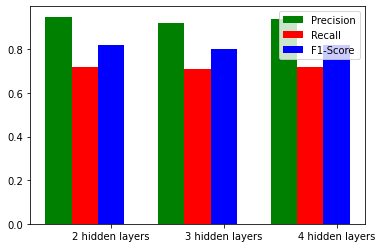

In [26]:
import matplotlib.pyplot as plt
name_list = ['2 hidden layers','3 hidden layers','4 hidden layers']
pre_list = [0.95,0.92,0.94]
rec_list=[0.72,0.71,0.72]
f1_list=[0.82,0.80,0.82]
total_width, n = 0.7, 3
width = total_width / n
x =[0,1,2]
plt.bar(x, pre_list, width=width, label='Precision',fc = 'g')
for i in range(len(x)):
 	x[i] = x[i] + width
plt.bar(x, rec_list, width=width, label='Recall',tick_label = name_list,fc = 'r')
for i in range(len(x)):
 	x[i] = x[i] + width
plt.bar(x, f1_list, width=width, label='F1-Score',tick_label = name_list,fc = 'b')
plt.legend()
plt.show()